<a href="https://colab.research.google.com/github/Balasai6567/NLP-/blob/main/EXP_9_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tweepy textblob

In [4]:
import pandas as pd
from textblob import TextBlob

data = pd.read_csv('/content/Twitter_Data.csv')
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [14]:
print(data.columns)


Index(['clean_text', 'category'], dtype='object')


In [17]:
# Fill missing values in 'clean_text' column with an empty string
data['clean_text'].fillna('', inplace=True)

# Apply sentiment analysis to the 'clean_text' column
data['sentiment'] = data['clean_text'].apply(analyze_sentiment)

# Map sentiment values to labels
sentiment_map = {0: 'positive', 1: 'negative', -1: 'neutral'}
data['sentiment_label'] = data['sentiment'].map(sentiment_map)

# Print the 'clean_text' and 'sentiment_label' columns
print(data[['clean_text', 'sentiment_label']])

# Save the updated DataFrame to a CSV file
data.to_csv('/content/Twitter_Data.csv', index=False)


                                              clean_text sentiment_label
0      when modi promised “minimum government maximum...        negative
1      talk all the nonsense and continue all the dra...         neutral
2      what did just say vote for modi  welcome bjp t...        positive
3      asking his supporters prefix chowkidar their n...        positive
4      answer who among these the most powerful world...        positive
...                                                  ...             ...
23936               but modi unable manage the one wife         negative
23937  clsas wood remains doubleoverweight india sees...         neutral
23938  bloody fake gandhis are dying for power and mo...        negative
23939  gaya news narendra modi will contest election ...         neutral
23940  think should present proper blueprint how goin...         neutral

[23941 rows x 2 columns]


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your text data is stored in a column named 'clean_text' and the label is stored in a column named 'sentiment_label'
X = data['clean_text']
y = data['sentiment_label']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8435999164752558
Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.69      0.77      1104
     neutral       0.80      0.92      0.86      1665
    positive       0.87      0.87      0.87      2020

    accuracy                           0.84      4789
   macro avg       0.85      0.82      0.83      4789
weighted avg       0.85      0.84      0.84      4789



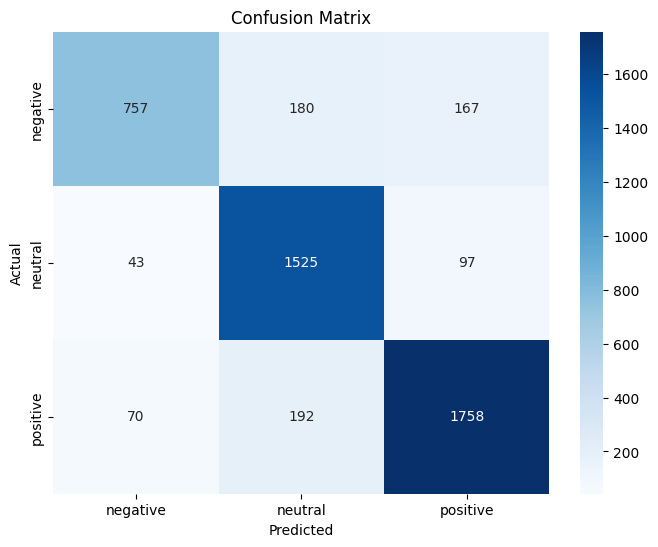

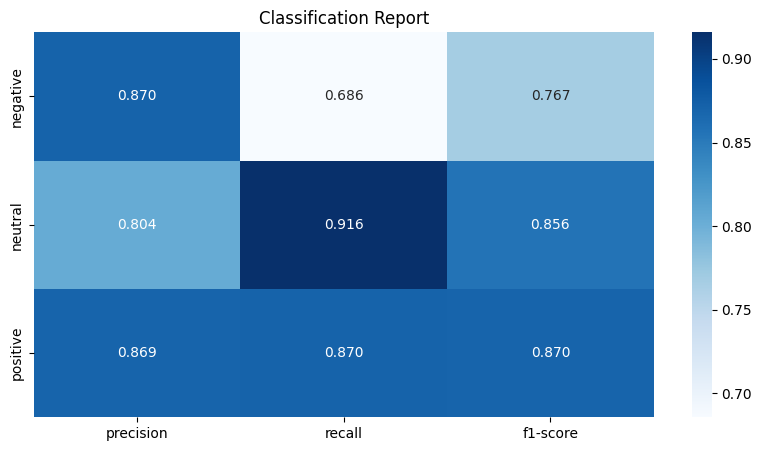

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

def plot_classification_report(y_true, y_pred):
    clf_report = classification_report(y_true, y_pred, output_dict=True)
    df = pd.DataFrame(clf_report).transpose()
    df = df.drop(['accuracy', 'macro avg', 'weighted avg'], axis=0)
    df['support'] = df['support'].astype(int)
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.iloc[:, :3], annot=True, fmt=".3f", cmap='Blues')
    plt.title('Classification Report')
    plt.show()

y_pred = model.predict(X_test)

plot_confusion_matrix(y_test, y_pred)

plot_classification_report(y_test, y_pred)

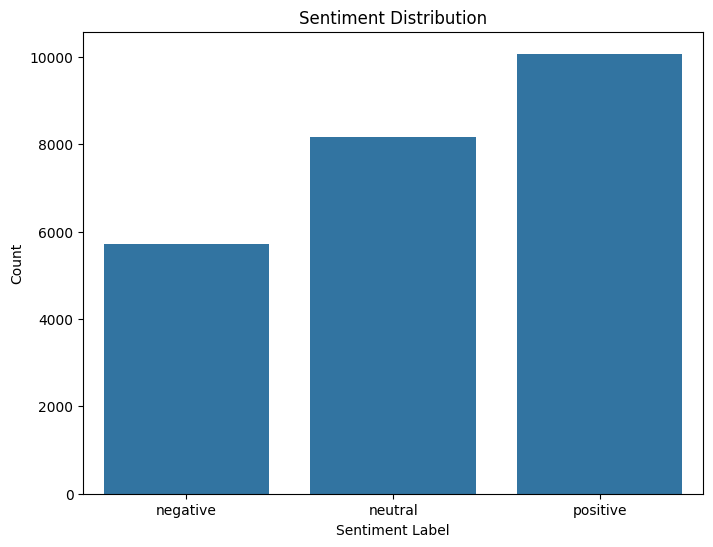

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


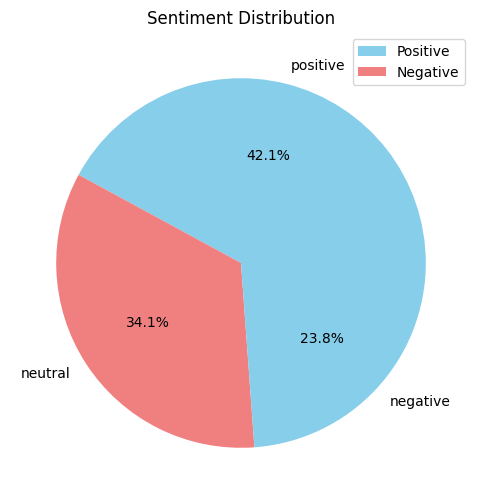

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
data['sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.legend(labels=['Positive', 'Negative'], loc='upper right')
plt.show()


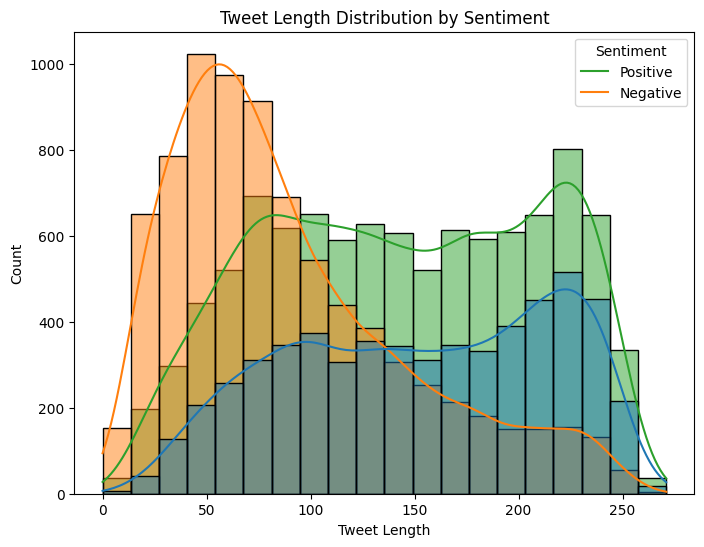

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x=data['clean_text'].apply(len), hue='sentiment_label', bins=20, kde=True)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])
plt.show()


In [24]:
def get_sentiment_scores(text):

    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

In [27]:
# Apply the get_sentiment_scores function to each tweet in the 'clean_text' column
data['sentiment_score'] = data['clean_text'].apply(get_sentiment_scores)

# Print the DataFrame to verify the changes
print(data.head())



                                          clean_text  category  sentiment  \
0  when modi promised “minimum government maximum...      -1.0          1   
1  talk all the nonsense and continue all the dra...       0.0         -1   
2  what did just say vote for modi  welcome bjp t...       1.0          0   
3  asking his supporters prefix chowkidar their n...       1.0          0   
4  answer who among these the most powerful world...       1.0          0   

  sentiment_label                            sentiment_score  
0        negative                                (-0.3, 0.7)  
1         neutral                                 (0.0, 0.0)  
2        positive  (0.48333333333333334, 0.6166666666666667)  
3        positive                 (0.15, 0.6583333333333333)  
4        positive                                (0.4, 0.75)  


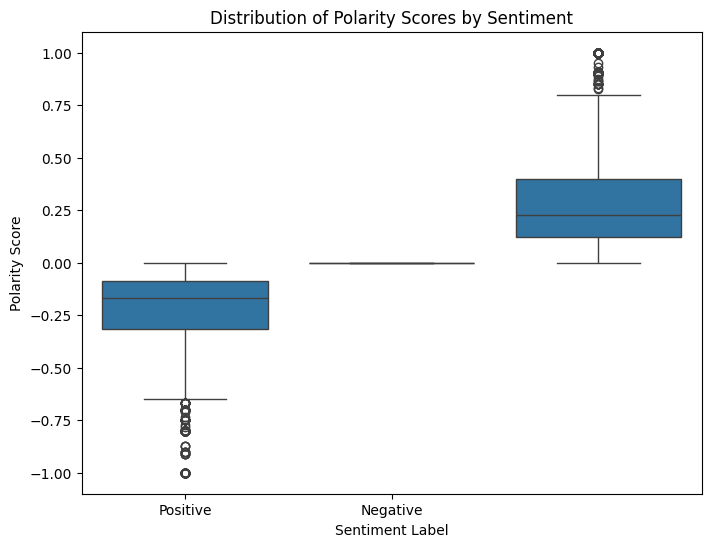

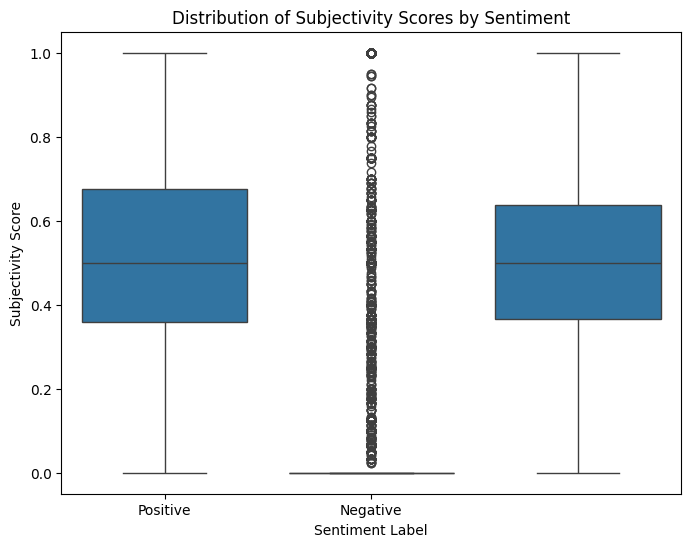

In [30]:
# Extract polarity and subjectivity scores from the 'sentiment_score' column
data['polarity'] = data['sentiment_score'].apply(lambda x: x[0])
data['subjectivity'] = data['sentiment_score'].apply(lambda x: x[1])

# Plot the distribution of sentiment scores by sentiment label using box plots
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='polarity', data=data)
plt.title('Distribution of Polarity Scores by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Polarity Score')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment_label', y='subjectivity', data=data)
plt.title('Distribution of Subjectivity Scores by Sentiment')
plt.xlabel('Sentiment Label')
plt.ylabel('Subjectivity Score')
plt.xticks([0, 1], ['Positive', 'Negative'])
plt.show()


In [31]:
!pip install wordcloud

In [32]:
from wordcloud import WordCloud
# Define a function to generate word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

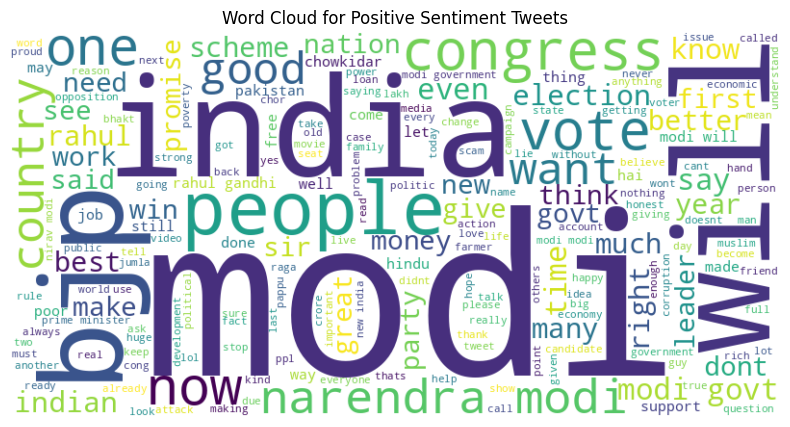

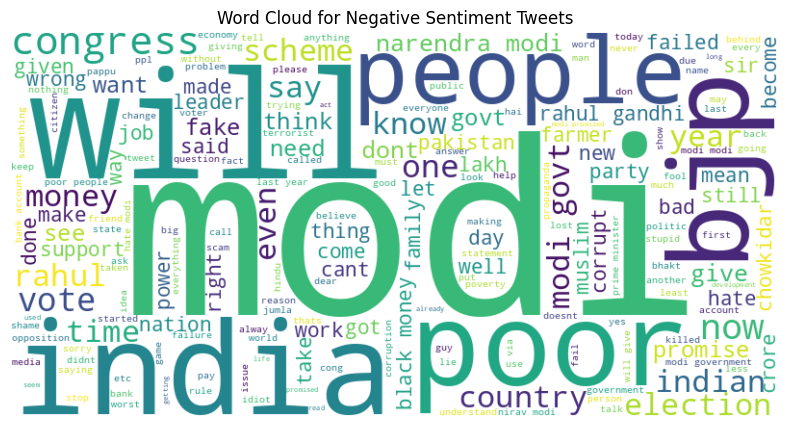

In [34]:
# Assuming you have a function generate_word_cloud(text, title) to generate word clouds

# Filter positive and negative tweets
positive_tweets = data[data['sentiment_label'] == 'positive']['clean_text'].values
negative_tweets = data[data['sentiment_label'] == 'negative']['clean_text'].values

# Join the text of positive and negative tweets
positive_tweets_text = ' '.join(positive_tweets)
negative_tweets_text = ' '.join(negative_tweets)

# Generate word clouds
generate_word_cloud(positive_tweets_text, 'Word Cloud for Positive Sentiment Tweets')
generate_word_cloud(negative_tweets_text, 'Word Cloud for Negative Sentiment Tweets')
